In [2]:
# dir.create("SILVER")

In [9]:
# for(i in 1:100)
#     unlink(i, recursive=T)

In [2]:
library(jsonlite)


Attaching package: ‘rjson’


The following objects are masked from ‘package:jsonlite’:

    fromJSON, toJSON




In [76]:
result = list(win=rep(0,12), lose=rep(0,12))
for(index in 1:100){
    data = fromJSON(paste0('GOLD/',index,'/match.json'))
    teams = data$teams
    unionT = teams[[1]]
    for(i in 2:20) unionT = rbind(unionT, teams[[i]])

    durations = data$gameDuration
    minutes = unlist(durations) / 60
    unionT = unionT[which(minutes>40)*2 -1,]
    
    winner = unionT[unionT$win == "Win", 3:14]
    loser = unionT[unionT$win == "Fail", 3:14]

    w1 = do.call(cbind, lapply(winner[1:6], sum))
    l1 = do.call(cbind, lapply(loser[1:6], sum))
    w2 = do.call(cbind, lapply(winner[7:12], sum))
    l2 = do.call(cbind, lapply(loser[7:12], sum))
 
    w = cbind(w1,w2)
    l = cbind(l1,l2)
    
    result$win = result$win + w
    result$lose = result$lose + l
    
}

In [77]:
result

firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills
18,23,28,23,18,15,330,101,44,138,0,22
firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills
27,27,18,26,24,24,319,44,40,137,0,30


In [78]:
winner = result$win / 1000
winner
loser = result$lose / 1000
loser


firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills
0.018,0.023,0.028,0.023,0.018,0.015,0.33,0.101,0.044,0.138,0,0.022


firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills
0.027,0.027,0.018,0.026,0.024,0.024,0.319,0.044,0.04,0.137,0,0.03


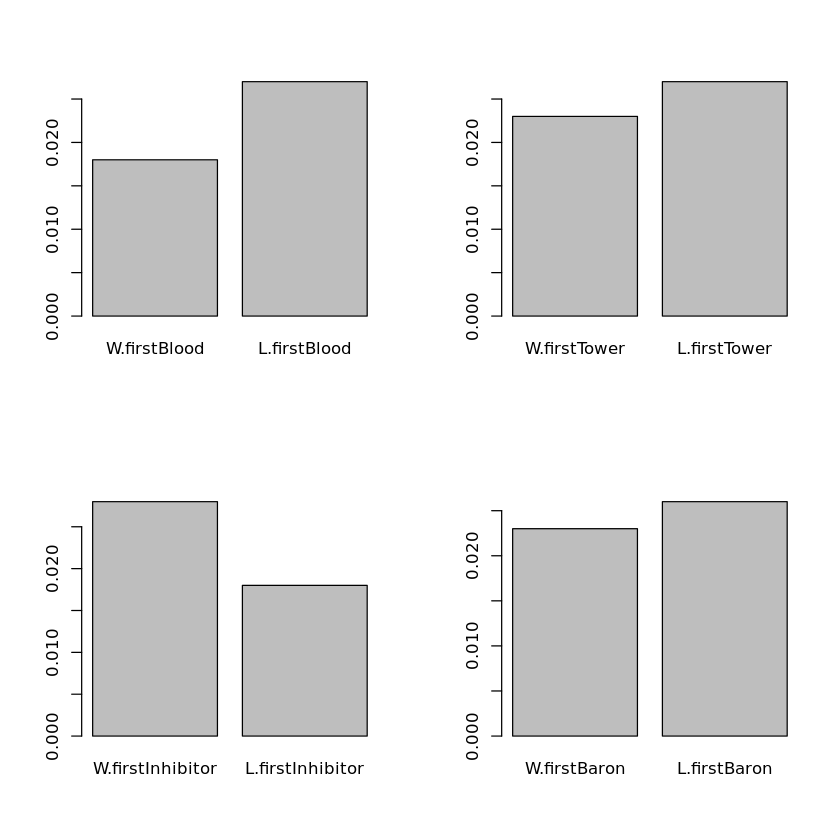

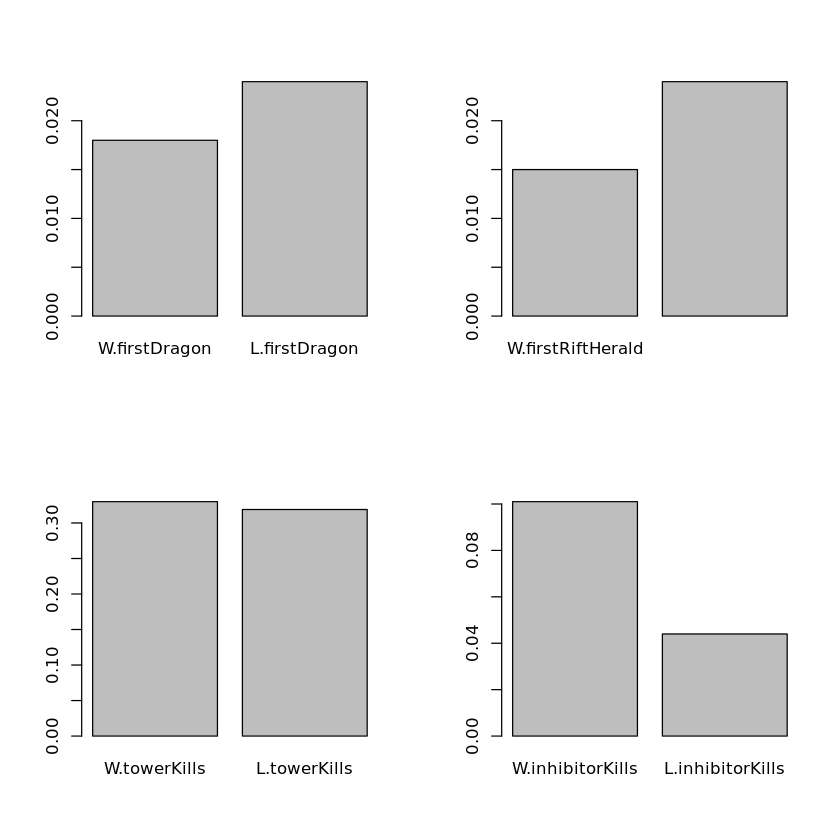

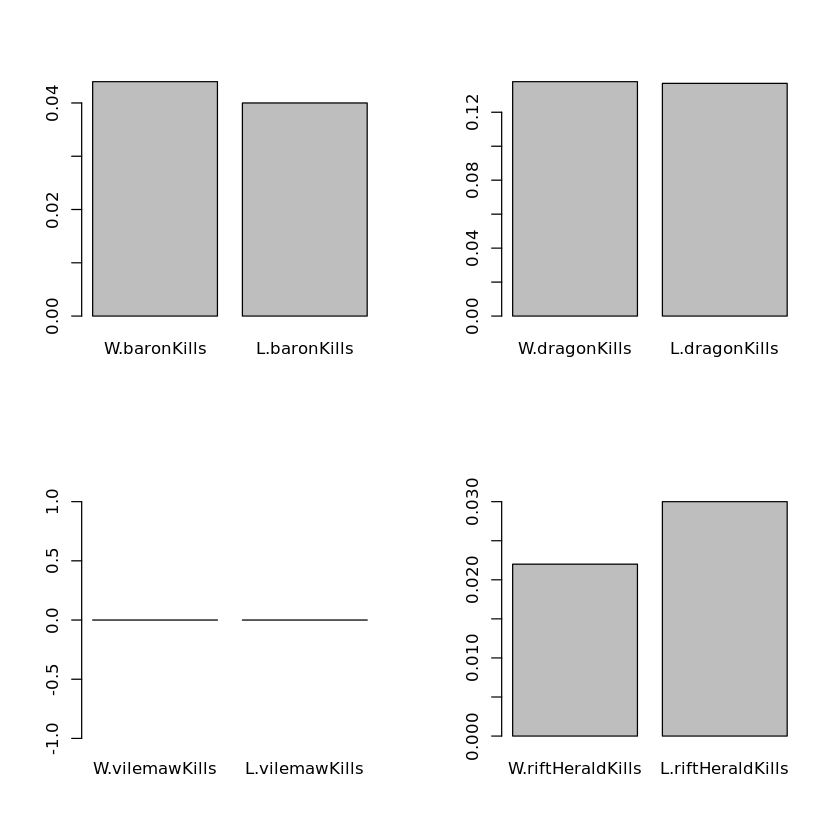

In [79]:
par(mfrow=c(2,2))
for(i in 1:12){
    barplot(c(W=winner[,i], L=loser[,i]))
}

# 결과: 어떤 요소가 승리에 영향을 미치는지 알 수 있었다.
# to-do: 경기시간이 길어질수록 영향력이 떨어지는 요소를 알아보자.